In [1]:
import wandb
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
directory = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(directory)
df.head()

wandb: Currently logged in as: marhiar. Use `wandb login --relogin` to force relogin


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [3]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Notes in brief exploration

Remove variables:
- id, host_id - Do not make sense to have
- nighbourhood and negibourhood group could be remove as we have latitude and longitude

Thoughts
- Build clusters with longitude and lattitude to remove cardinality



Negative correlations: 
- Longitude - price -> The higher the price the lower the longitude (right side) - Where are these cities located?
- Longitude - minimum number of nights (weak) - When longitude lower (right side) - More minumum days are required? This means that as the location is more popular, more # of nights are required


Positive correlations:
- Latitude - the higher the latitude the more expensive it is 
- The higher the price the higher the minimum number of nights is required 
- The number of reviews a place has the lower the price --> most frequent place bacause it is cheap
- The higher the price the more minimum number of nights is required

In [4]:
## Check NaN values

In [5]:
df.isna().sum()/len(df)

id                                0.00000
name                              0.00035
host_id                           0.00000
host_name                         0.00040
neighbourhood_group               0.00000
neighbourhood                     0.00000
latitude                          0.00000
longitude                         0.00000
room_type                         0.00000
price                             0.00000
minimum_nights                    0.00000
number_of_reviews                 0.00000
last_review                       0.20615
reviews_per_month                 0.20615
calculated_host_listings_count    0.00000
availability_365                  0.00000
dtype: float64

In [6]:
# From the 
df.drop(['id', 'name', 'host_name', 'host_id', 
         'neighbourhood','number_of_reviews',
         'reviews_per_month','last_review',
         'calculated_host_listings_count'], axis=1, inplace=True )

In [7]:
df.dtypes

neighbourhood_group     object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
availability_365         int64
dtype: object

In [8]:
df.shape

(20000, 7)

# Where are these apartments located?

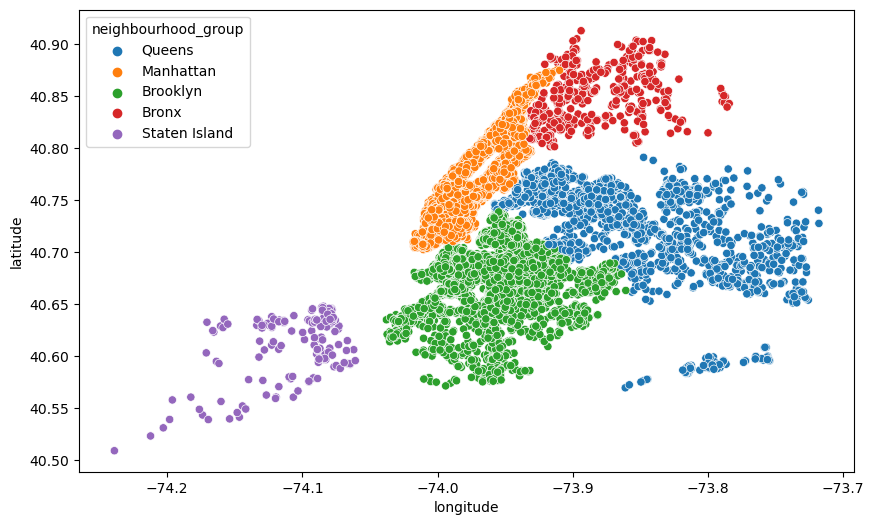

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group);

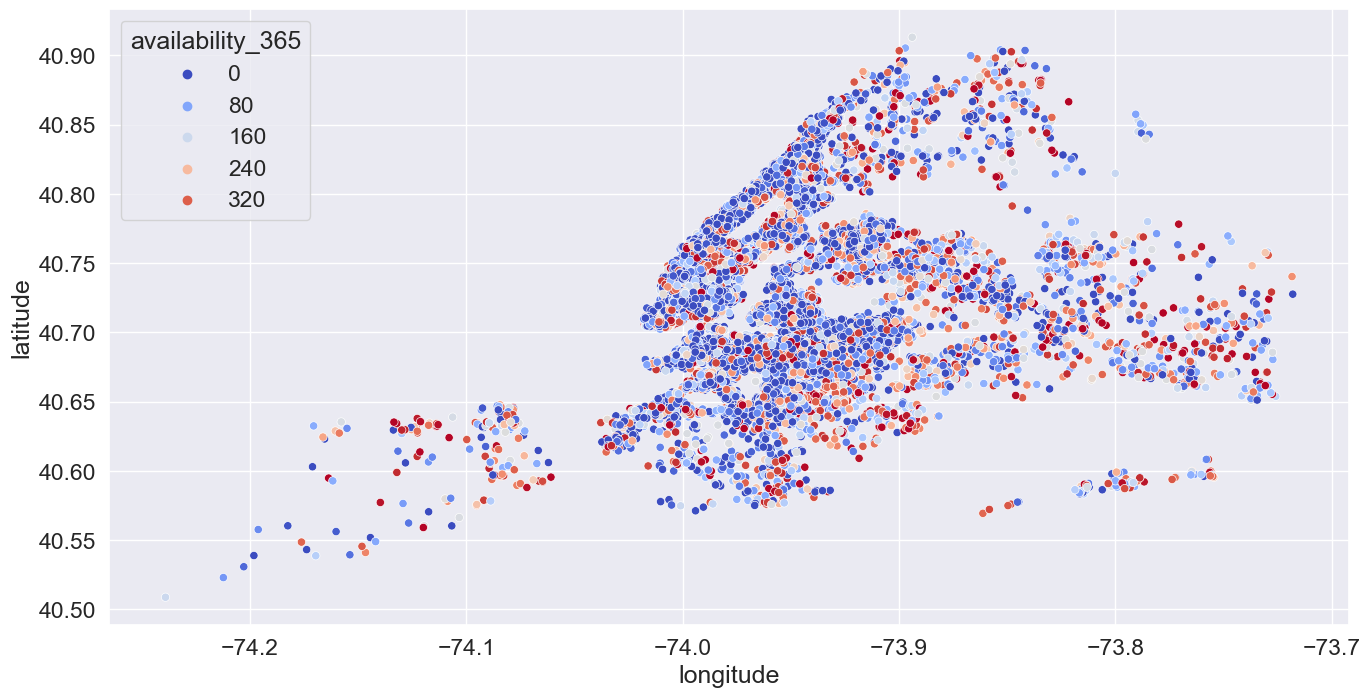

In [41]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

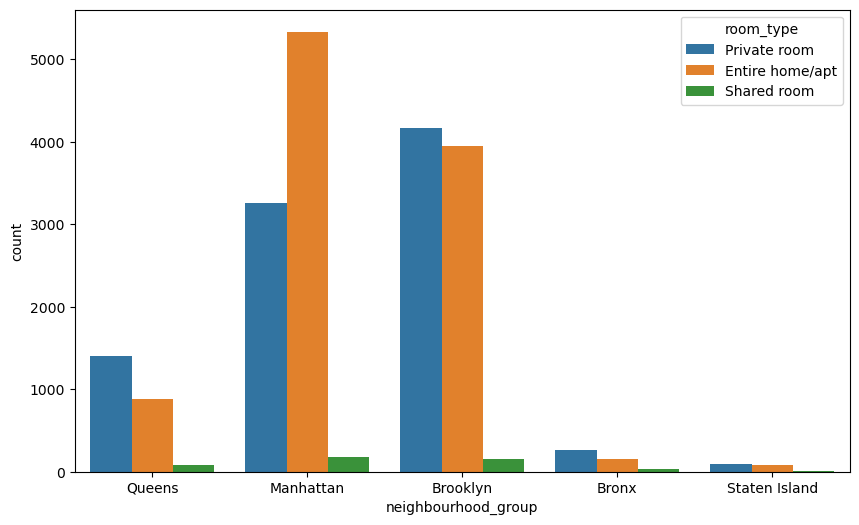

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')
plt.show()

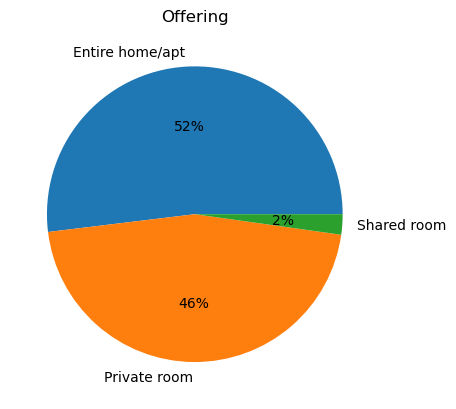

In [36]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['room_type'].value_counts().values, labels = df['room_type'].value_counts().index, autopct='%.0f%%')
plt.title('Offering')
plt.show()

In [65]:

df.price.max()

10000

In [52]:
rtype = df.groupby('room_type', as_index=False)
rtype.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Queens,40.74271,-73.92493,Private room,74,2,5
1,Manhattan,40.76682,-73.98878,Entire home/apt,170,3,188
2,Manhattan,40.73631,-74.00611,Entire home/apt,245,3,0
3,Queens,40.76424,-73.92351,Entire home/apt,125,3,13
4,Brooklyn,40.69839,-73.92044,Private room,65,2,8
5,Brooklyn,40.66025,-73.96270,Entire home/apt,120,3,16
6,Manhattan,40.76831,-73.95929,Entire home/apt,200,5,71
9,Brooklyn,40.71268,-73.96676,Private room,105,2,64
11,Brooklyn,40.65274,-73.95848,Private room,39,2,0
12,Brooklyn,40.69101,-73.97312,Private room,44,8,280


<AxesSubplot:xlabel='room_type', ylabel='price'>

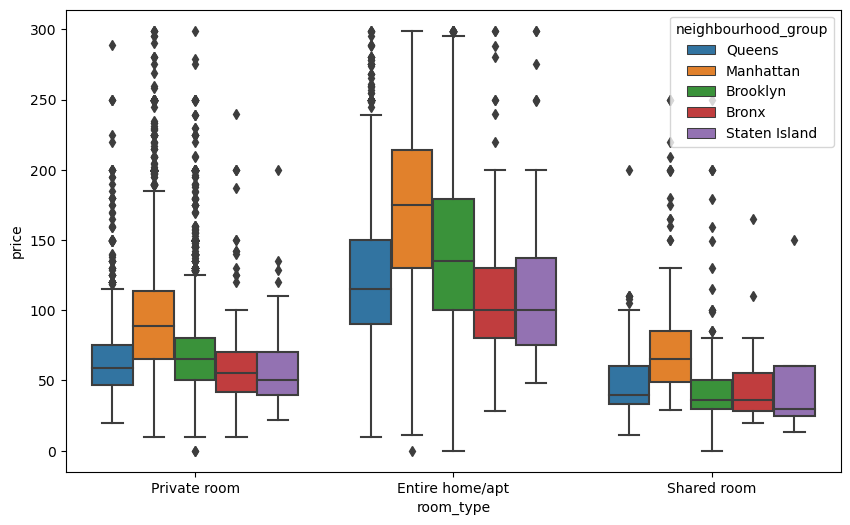

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['price']<300], x="room_type", y="price",hue="neighbourhood_group")

<AxesSubplot:xlabel='room_type', ylabel='availability_365'>

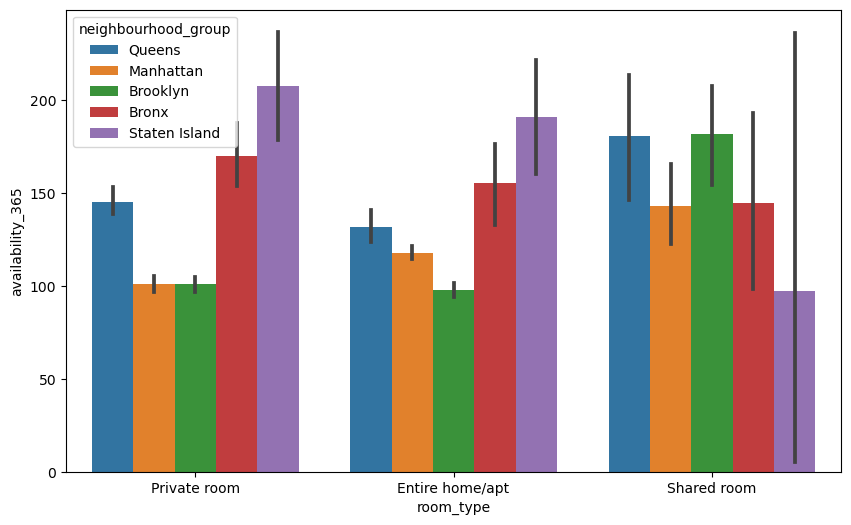

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="room_type", y="availability_365",hue="neighbourhood_group")

/opt/anaconda3/envs/udacity/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


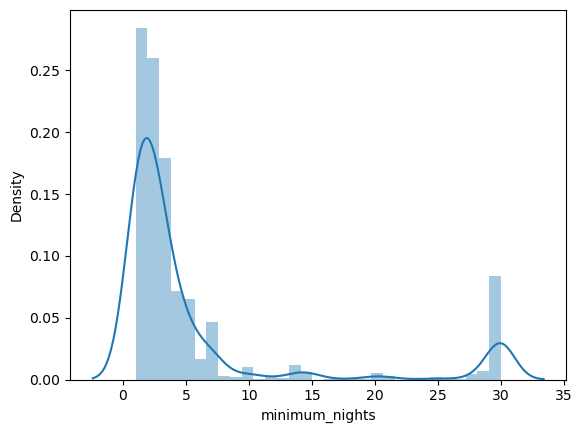

In [14]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

In [26]:
df.neighbourhood_group.unique()

array(['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [16]:
cat_features = ['neighbourhood_group', 'room_type']

In [17]:
dataset = pd.get_dummies(df, columns=cat_features)
dataset.head()

,latitude,longitude,price,minimum_nights,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.74271,-73.92493,74,2,5,0,0,0,1,0,0,1,0
1,40.76682,-73.98878,170,3,188,0,0,1,0,0,1,0,0
2,40.73631,-74.00611,245,3,0,0,0,1,0,0,1,0,0
3,40.76424,-73.92351,125,3,13,0,0,0,1,0,1,0,0
4,40.69839,-73.92044,65,2,8,0,1,0,0,0,0,1,0


<AxesSubplot:>

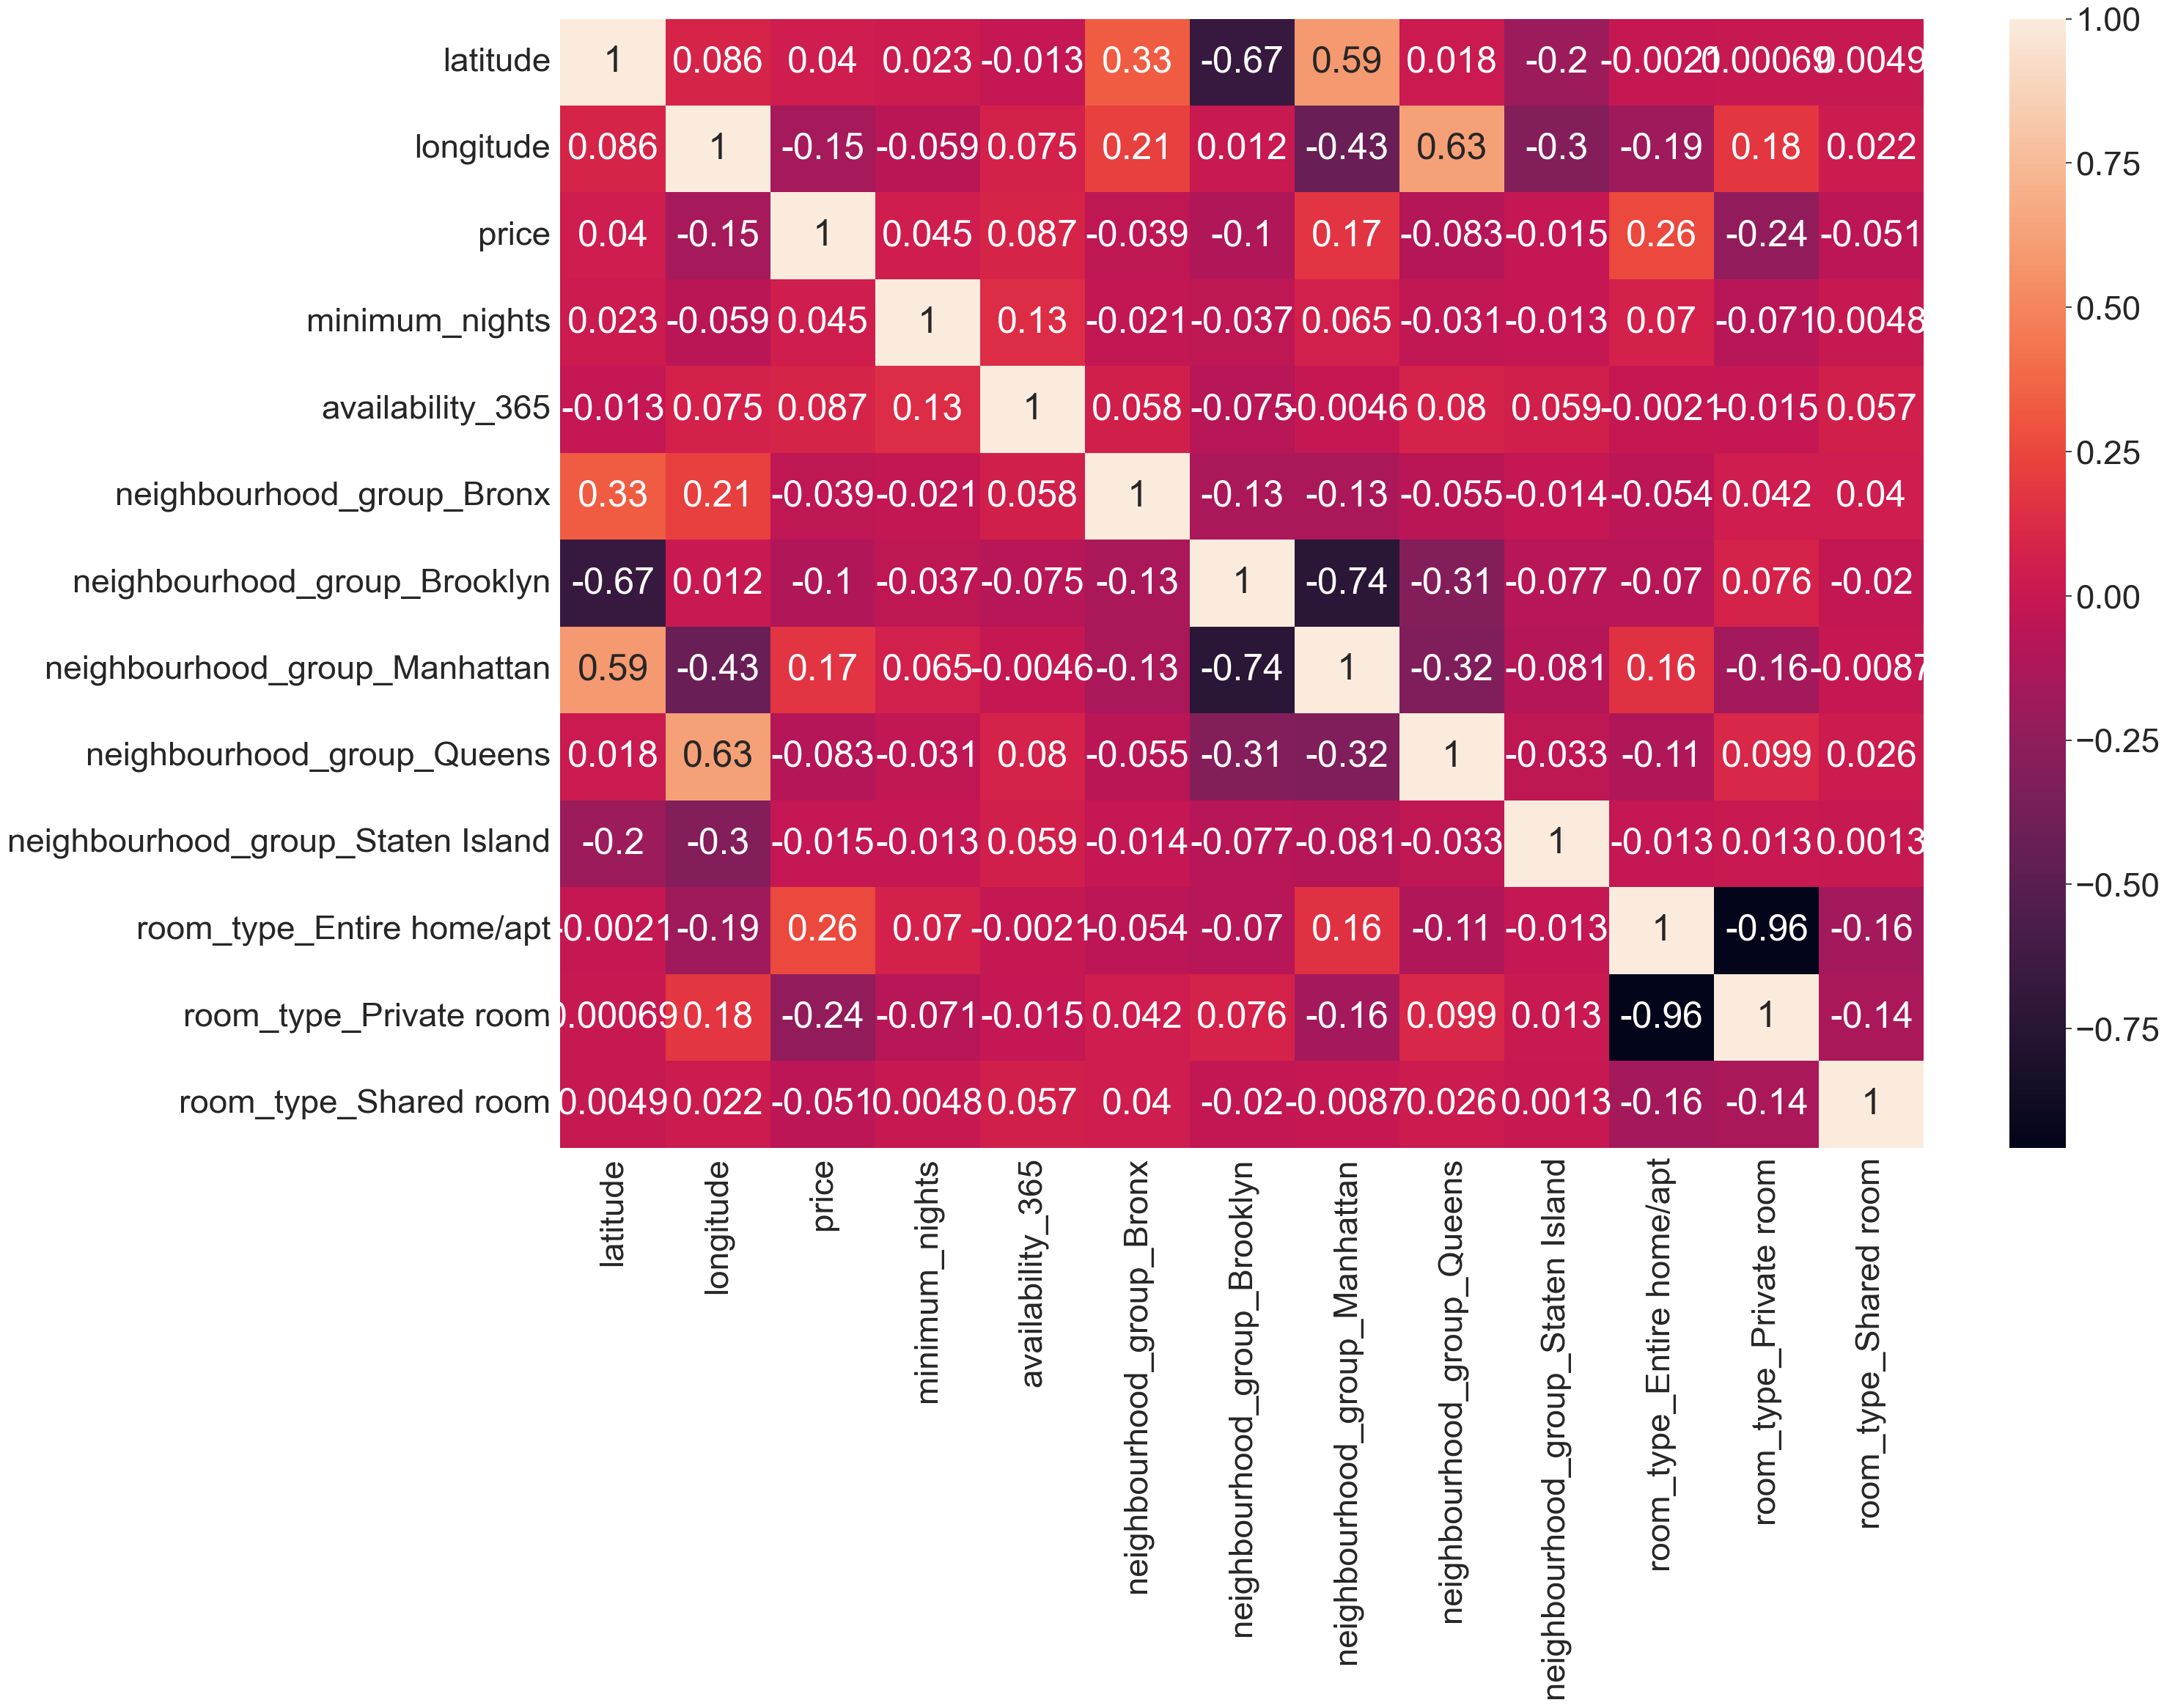

In [23]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(dataset.corr(), annot=True)

<Figure size 3000x3000 with 0 Axes>

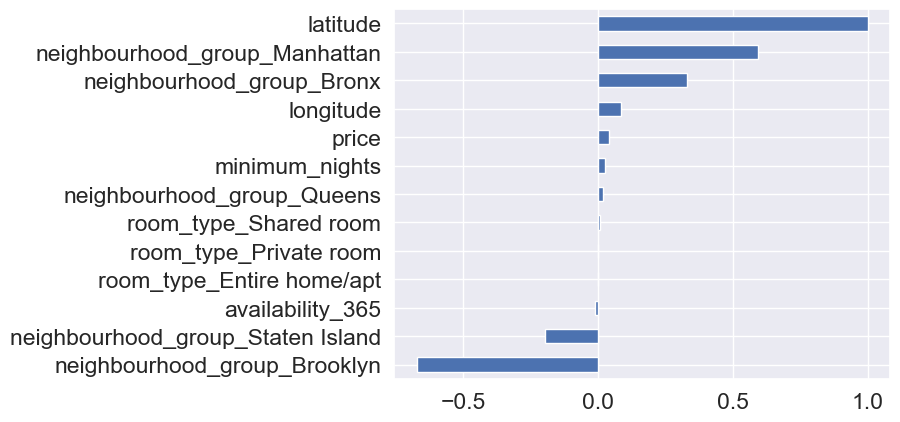

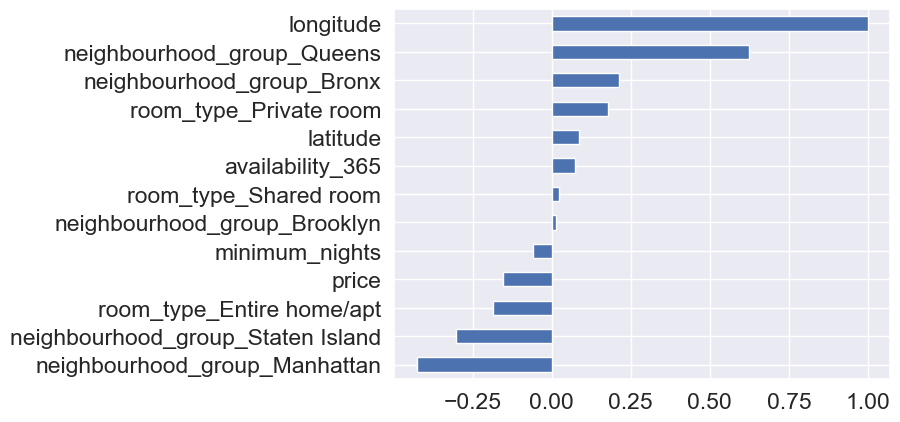

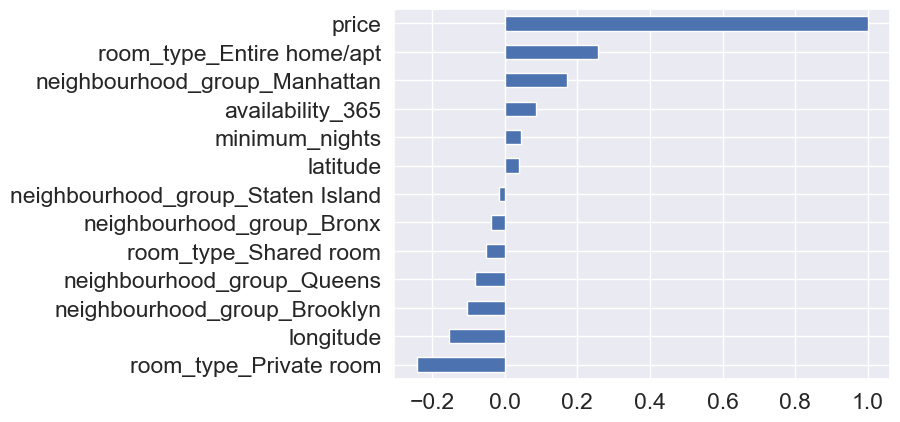

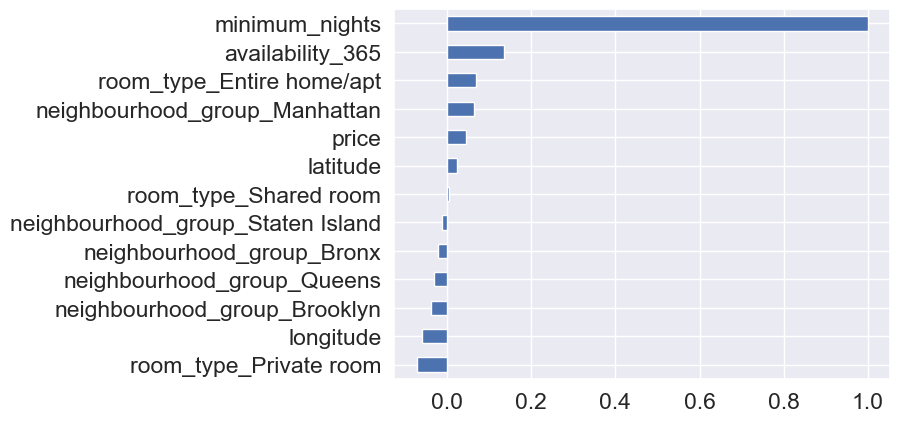

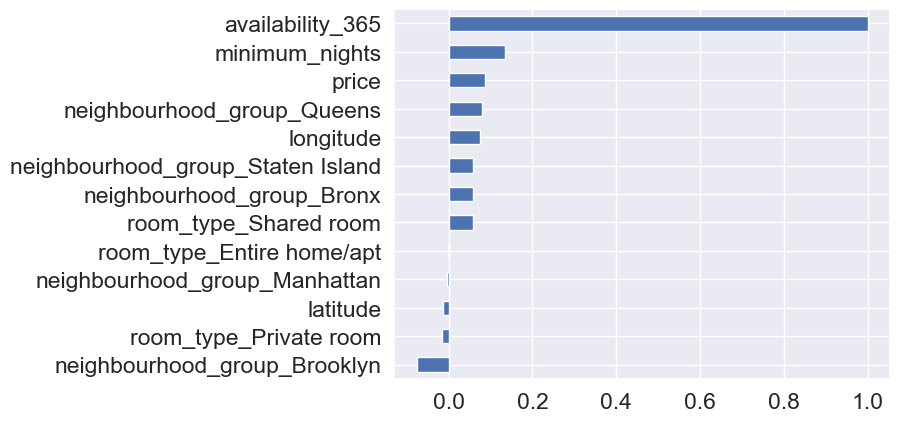

In [24]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
i = 1
for column in dataset.columns:
    if dataset[column].dtype == "float64" or dataset[column].dtype == "int64":
        plt.figure()
        dataset.corr()[column].sort_values().plot(kind="barh")
        i += 1

<AxesSubplot:title={'center':'Correlation with Outcome Variable'}>

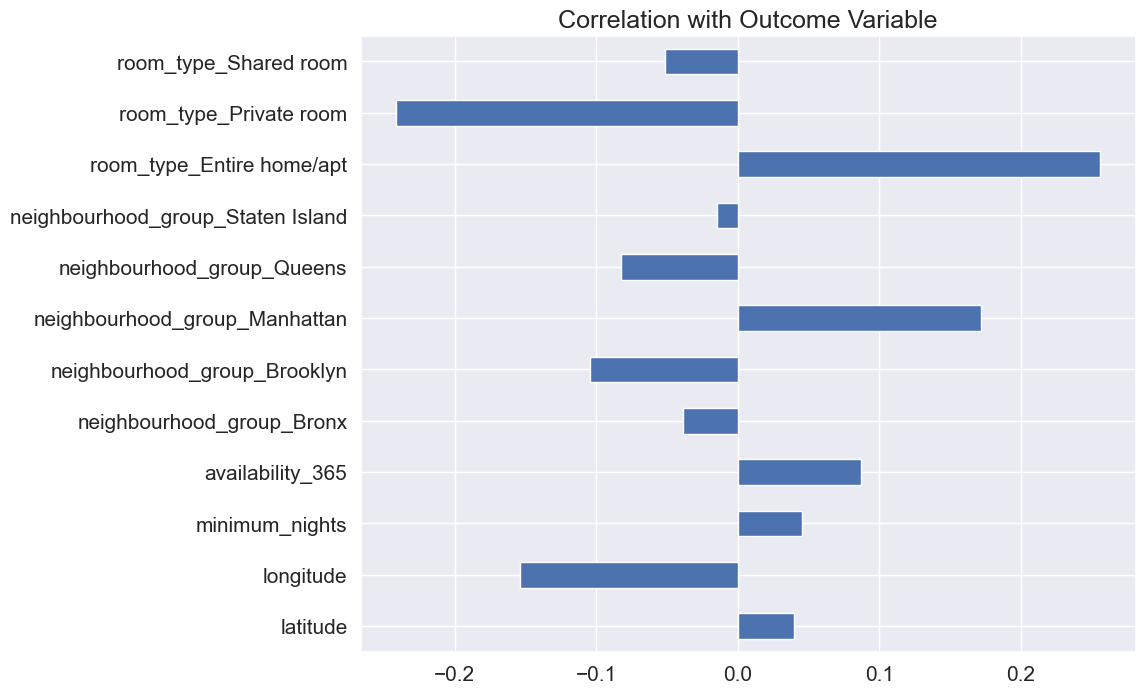

In [26]:
dataset.drop('price', axis=1).corrwith(dataset.price).plot.barh(figsize=(10, 8), 
                                                        title='Correlation with Outcome Variable',
                                                        fontsize=15, grid=True)

In [37]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['price'], axis=1)
y = dataset.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Baseline 

In [38]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [40]:
import numpy as np
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 73.76028312211248
MSE: 52819.94567163617
RMSE: 229.82590296055875
R2 Square 0.09315302102571255


In [36]:
import numpy as np
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 73.6889794726601
MSE: 53083.391128302974
RMSE: 230.3983314355878
R2 Square 0.08863001909026957


In [42]:
run.finish()